In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential

In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [3]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

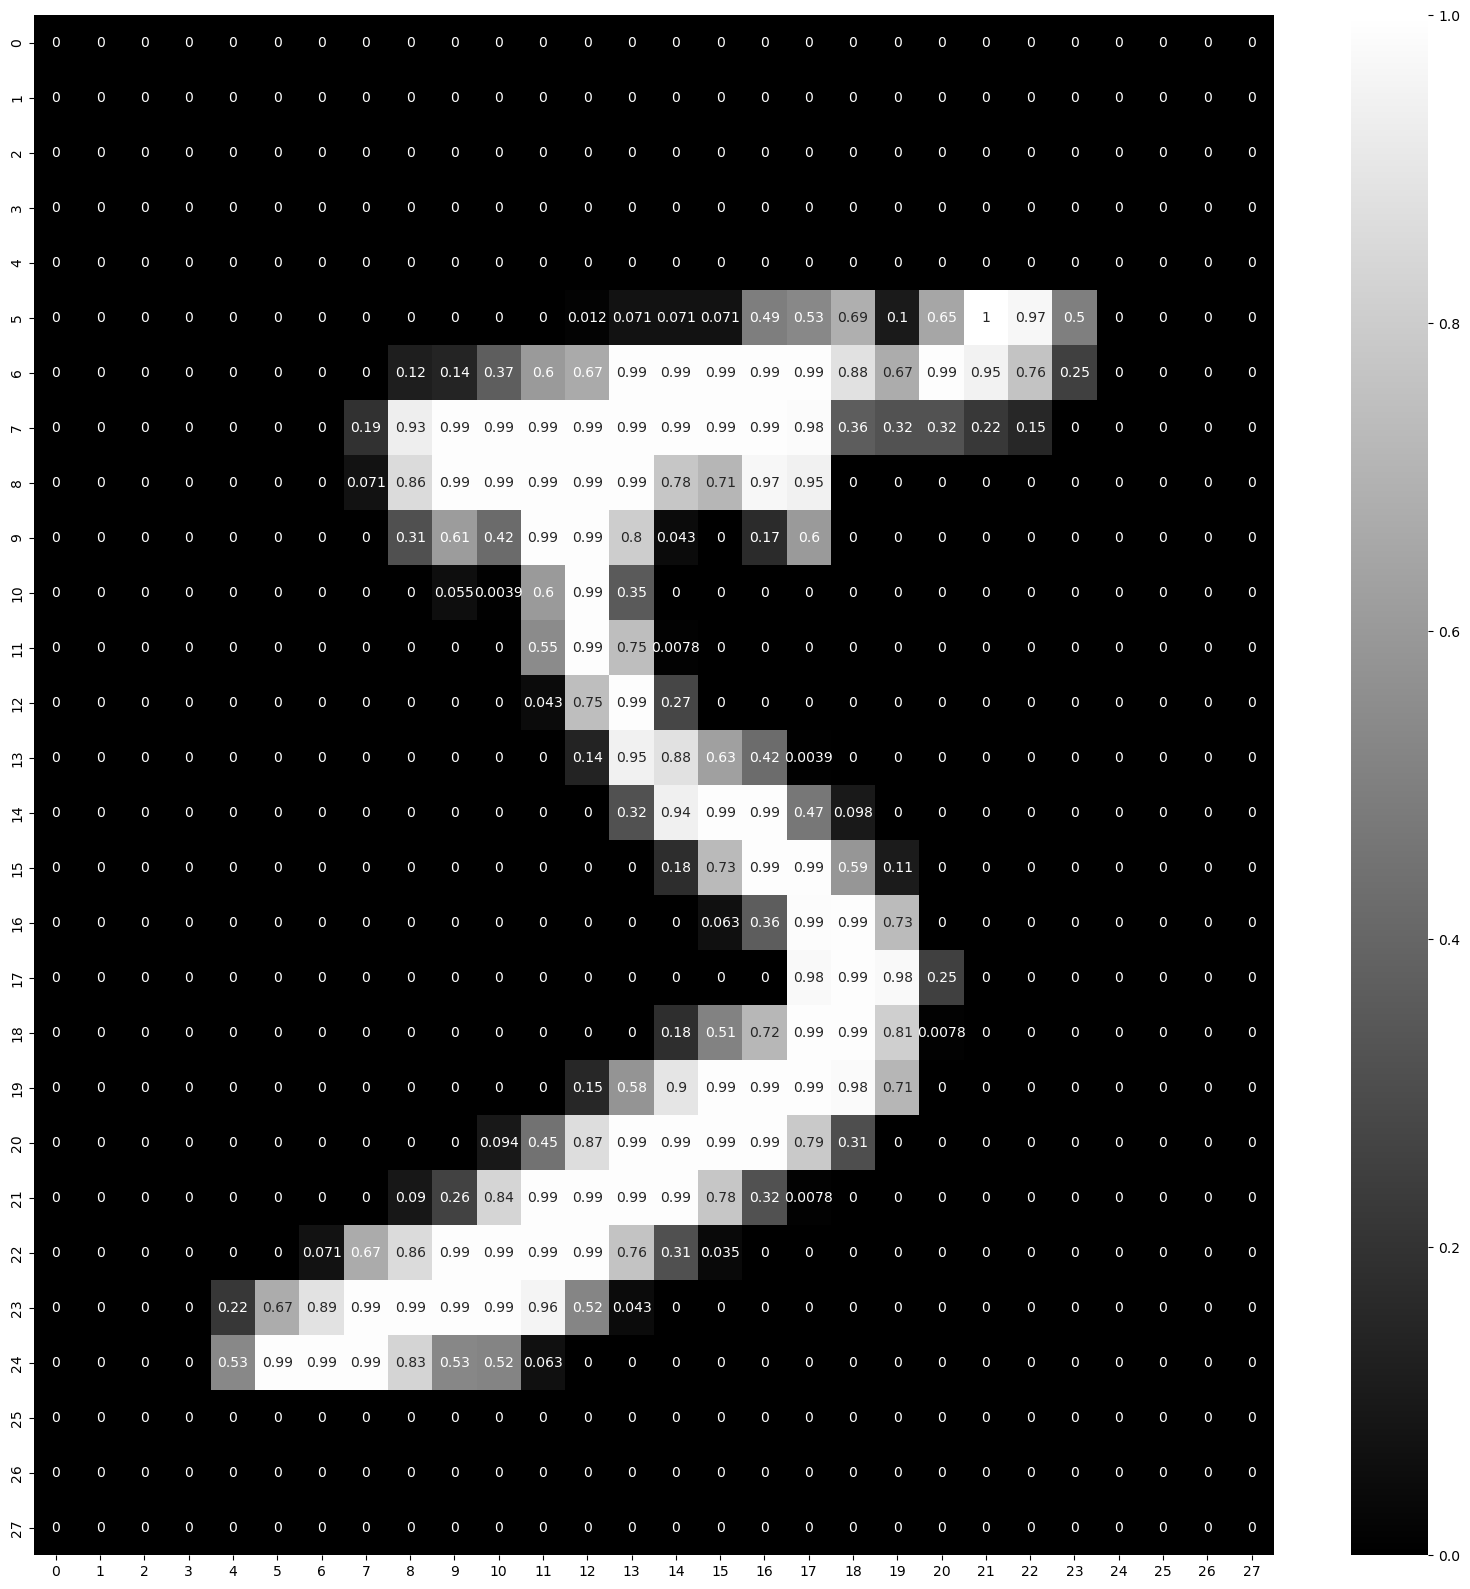

In [5]:
plt.figure(figsize=(20, 20))
sns.heatmap(X_train[0], cmap='gray', annot=True)
plt.show()

In [6]:
model = Sequential([
    Conv2D(32, kernel_size=(5,5),activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Conv2D(64, kernel_size=(5,5), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax'),
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 120)               1

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, epochs=10, validation_data = (X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.1322 - accuracy: 0.9588 - val_loss: 0.0452 - val_accuracy: 0.9854
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0433 - accuracy: 0.9863 - val_loss: 0.0343 - val_accuracy: 0.9889
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0296 - accuracy: 0.9905 - val_loss: 0.0321 - val_accuracy: 0.9894
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0223 - accuracy: 0.9932 - val_loss: 0.0249 - val_accuracy: 0.9911
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0181 - accuracy: 0.9946 - val_loss: 0.0281 - val_accuracy: 0.9930
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0151 - accuracy: 0.9952 - val_loss: 0.0281 - val_accuracy: 0.9920
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0139 - accuracy: 0.9956 - val_loss: 0.0283 - val_ac

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0383 - accuracy: 0.9902


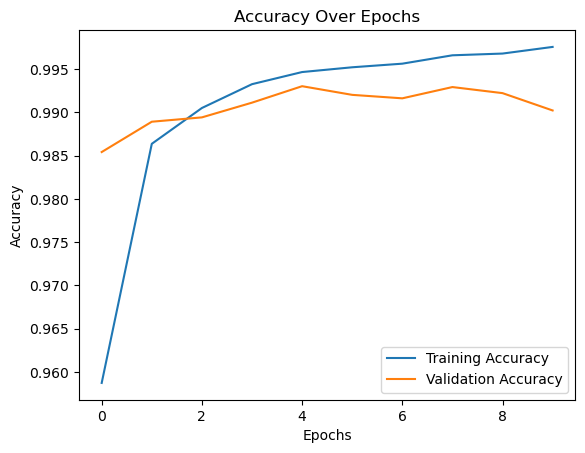

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

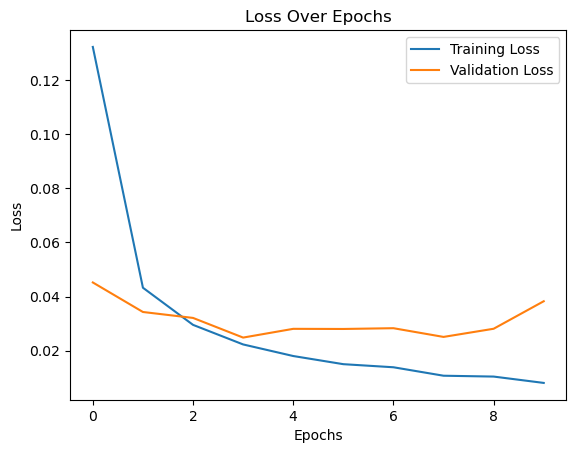

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

In [13]:
y_prob = model.predict(X_test.reshape(X_test.shape[0], 28, 28, 1))

313/313 [==============================] - 1s 2ms/step


In [14]:
y_pred = np.argmax(y_prob, axis=1)

In [15]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

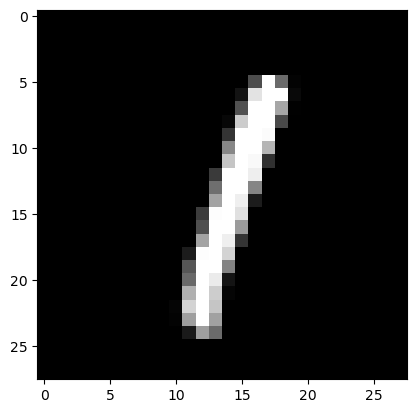

In [16]:
plt.imshow(X_test[5], cmap = 'gray')

In [17]:
y_pred[5]

1

In [18]:
model.save('lenet.h5')